In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mn
%matplotlib inline

In [90]:
df2 = pd.read_csv('C:/Users/shrey/Desktop/ABA Project/Group Project Option 2 QVC/order_master.csv')
df2.head(10)

,ORDER_NBR,ORDER_LINE_NBR,CUSTOMER_NBR,PRODUCT_NBR,ORDER_PLATFORM,ORDER_DATE,ORDER_TIME,TOTAL_LINE_AMT
0,O150021637,1,151575901,P150028635,QVC.COM,2015-01-01,00:27:31,103
1,O150023737,1,151967484,P150028635,QVC.COM,2015-01-01,00:49:46,103
2,O157979478,1,153235967,P150028635,On Air,2015-01-01,00:20:21,103
3,O157979514,2,151376686,P150025286,On Air,2015-01-01,00:24:17,21
4,O150025459,1,152113883,P150048858,QVC.COM,2015-01-01,01:13:59,178
5,O150027389,1,152815384,P150000250,QVC.COM,2015-01-01,02:06:51,33
6,O150026271,1,153867980,P150018581,QVC.COM,2015-01-01,01:34:06,86
7,O150028997,1,152039090,P150028635,QVC.COM,2015-01-01,03:41:54,203
8,O150031641,2,152033639,P150039481,QVC.COM,2015-01-01,07:30:17,24
9,O150031488,1,152275813,P150042231,QVC.COM,2015-01-01,07:24:03,31


In [91]:
df2 = df2.drop(['ORDER_NBR', 'ORDER_LINE_NBR', 'CUSTOMER_NBR', 'PRODUCT_NBR', 'ORDER_PLATFORM', 'ORDER_TIME'], axis=1)
df2.head(10)

,ORDER_DATE,TOTAL_LINE_AMT
0,2015-01-01,103
1,2015-01-01,103
2,2015-01-01,103
3,2015-01-01,21
4,2015-01-01,178
5,2015-01-01,33
6,2015-01-01,86
7,2015-01-01,203
8,2015-01-01,24
9,2015-01-01,31


In [92]:
df2['ORDER_DATE'] = pd.to_datetime(df2['ORDER_DATE'])
df2.head(10)

,ORDER_DATE,TOTAL_LINE_AMT
0,2015-01-01,103
1,2015-01-01,103
2,2015-01-01,103
3,2015-01-01,21
4,2015-01-01,178
5,2015-01-01,33
6,2015-01-01,86
7,2015-01-01,203
8,2015-01-01,24
9,2015-01-01,31


In [93]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df2 = df2['TOTAL_LINE_AMT'].groupby(df2['ORDER_DATE']).agg(['sum']).reset_index()
df2.head(10)

,ORDER_DATE,sum
0,2014-12-17,997
1,2015-01-01,3656258
2,2015-01-02,3473420
3,2015-01-03,4713863
4,2015-01-04,4250090
5,2015-01-05,3228927
6,2015-01-06,2956335
7,2015-01-07,3387351
8,2015-01-08,4471845
9,2015-01-09,3301963


In [94]:
df2 = df2.rename(columns={'ORDER_DATE': 'DATE'})


In [95]:
df2 = df2.fillna(0)
df2.head(10)

,DATE,sum
0,2014-12-17,997
1,2015-01-01,3656258
2,2015-01-02,3473420
3,2015-01-03,4713863
4,2015-01-04,4250090
5,2015-01-05,3228927
6,2015-01-06,2956335
7,2015-01-07,3387351
8,2015-01-08,4471845
9,2015-01-09,3301963


In [96]:
df2 = df2.set_index(['DATE'])
df2.drop(df2.index[[0]], inplace=True)


In [97]:
type(df2['sum'])


pandas.core.series.Series

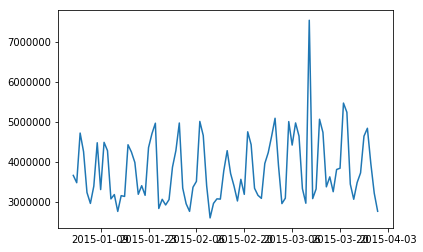

In [98]:
import matplotlib.pylab as pl
pl.plot(df2['sum'])


In [99]:
# Check whether series is white noise
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df2['sum'])


(array([   3.96954187,    7.31985647,   11.96812172,   15.21289974,
          16.02587717,   28.33830239,   46.41266112,   49.22702759,
          51.33151909,   53.07979984,   55.83861018,   57.0749977 ,
          61.44202804,   76.65740164,   79.84525919,   80.75002872,
          83.64230254,   89.2962852 ,   93.14894891,   95.72907059,
         111.04602599,  114.22501037,  117.06036628,  125.94892364,
         134.45153182,  136.26444862,  140.61721912,  154.78686228,
         155.30599635,  159.77406019,  165.84377036,  168.40048126,
         169.41656016,  173.19468976,  180.95469743,  181.07263229,
         186.24112074,  190.33473467,  192.77500336,  192.91771155]),
 array([  4.63303758e-02,   2.57343595e-02,   7.49316362e-03,
          4.27941927e-03,   6.77058047e-03,   8.11319076e-05,
          7.26559261e-08,   5.75143059e-08,   6.04592047e-08,
          7.19614638e-08,   5.44008839e-08,   7.66157139e-08,
          2.89704358e-08,   1.17349560e-10,   7.45476332e-11,
        

In [101]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


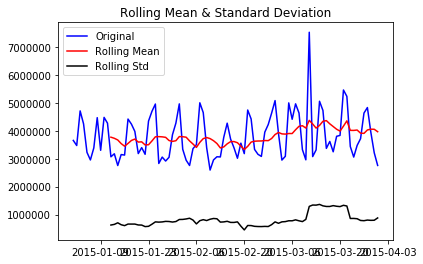

Results of Dickey-Fuller Test:
Test Statistic                -2
p-value                        0
#Lags Used                     7
Number of Observations Used   82
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [102]:
test_stationarity(df2['sum'])


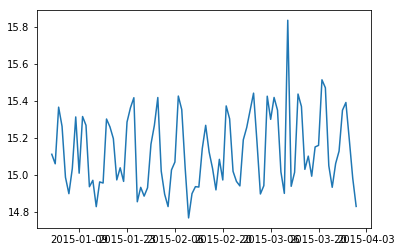

In [103]:
ts_log = np.log(df2['sum'])
plt.plot(ts_log)

# Moving average
In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


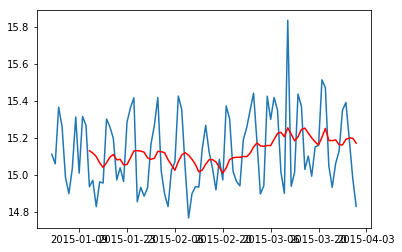

In [104]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [105]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

DATE
2015-01-01   nan
2015-01-02   nan
2015-01-03   nan
2015-01-04   nan
2015-01-05   nan
2015-01-06   nan
2015-01-07   nan
2015-01-08   nan
2015-01-09   nan
2015-01-10   nan
2015-01-11   nan
2015-01-12    -0
Name: sum, dtype: float64

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


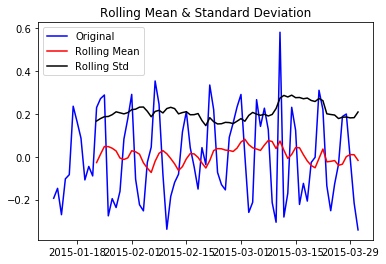

Results of Dickey-Fuller Test:
Test Statistic                -2
p-value                        0
#Lags Used                     7
Number of Observations Used   71
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [106]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

# Exponentially weighted moving average
Lets take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving averagem where weights are assigned to all the previous values with a decay factor

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


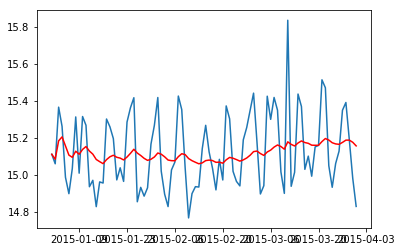

In [107]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


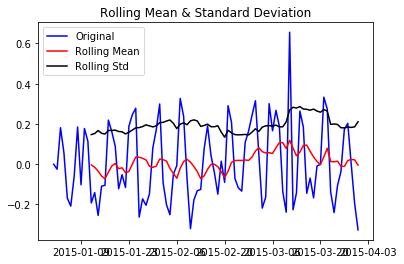

Results of Dickey-Fuller Test:
Test Statistic                -2
p-value                        0
#Lags Used                     7
Number of Observations Used   82
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [108]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

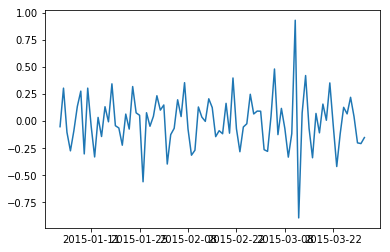

In [109]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


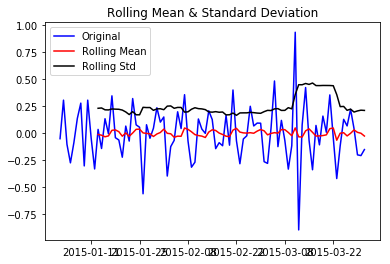

Results of Dickey-Fuller Test:
Test Statistic                -8
p-value                        0
#Lags Used                     6
Number of Observations Used   82
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [110]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

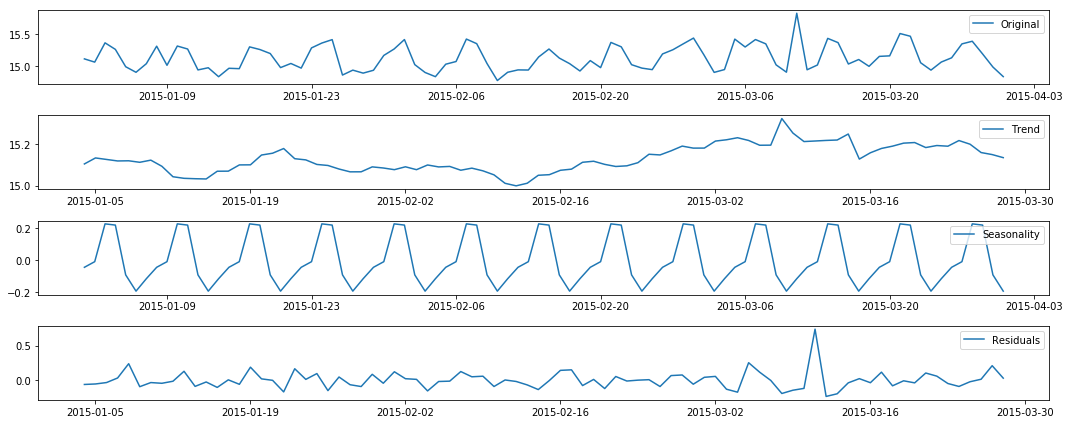

In [125]:
from statsmodels.tsa.seasonal import seasonal_decompose
fq=7
decomposition = seasonal_decompose(ts_log,freq=fq)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


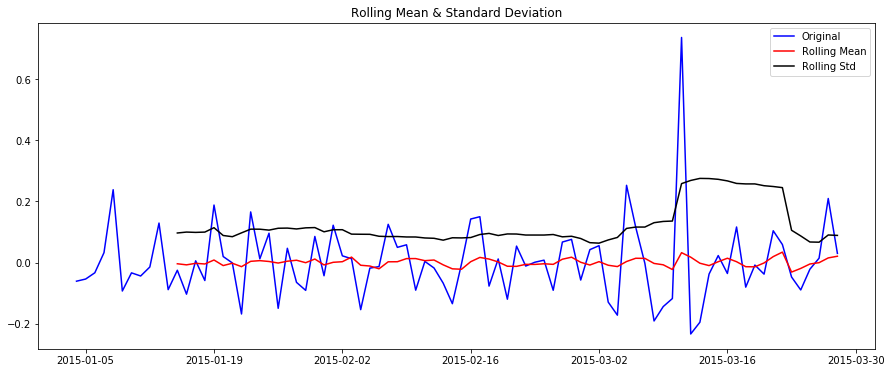

Results of Dickey-Fuller Test:
Test Statistic                -6
p-value                        0
#Lags Used                     7
Number of Observations Used   76
Critical Value (1%)           -4
Critical Value (5%)           -3
Critical Value (10%)          -3
dtype: float64


In [126]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Forecasting a time series

In [113]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [114]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

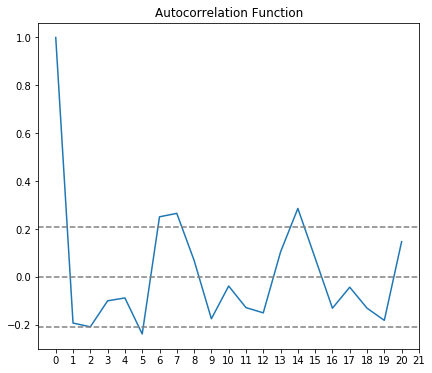

In [115]:
#Plot ACF: 
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.subplot(121) 
plt.plot(lag_acf)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5,1,'Partial Autocorrelation Function')

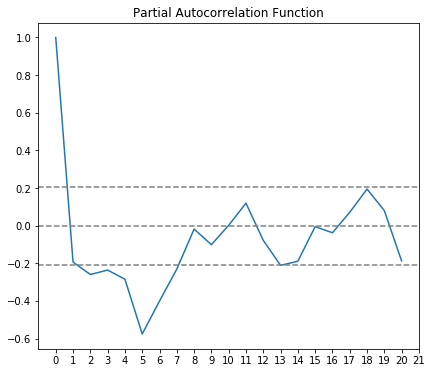

In [116]:
#Plot PACF:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.subplot(122)
plt.plot(lag_pacf)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
#plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

In [117]:
from statsmodels.tsa.arima_model import ARIMA


Text(0.5,1,'RSS: 4.5874')

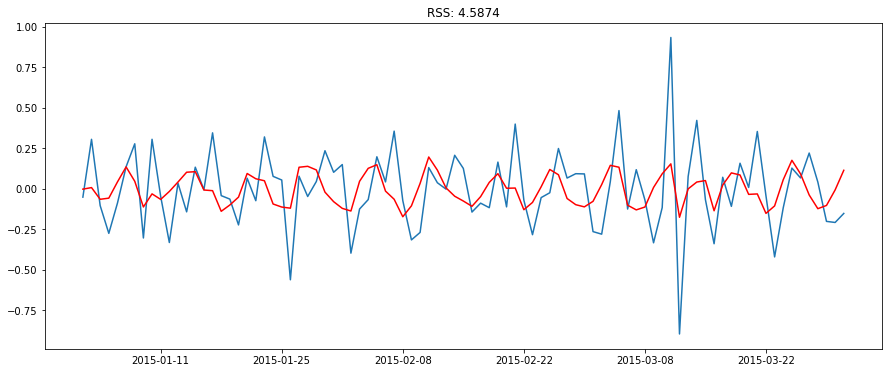

In [133]:
model = ARIMA(ts_log, order=(3, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 3.4322')

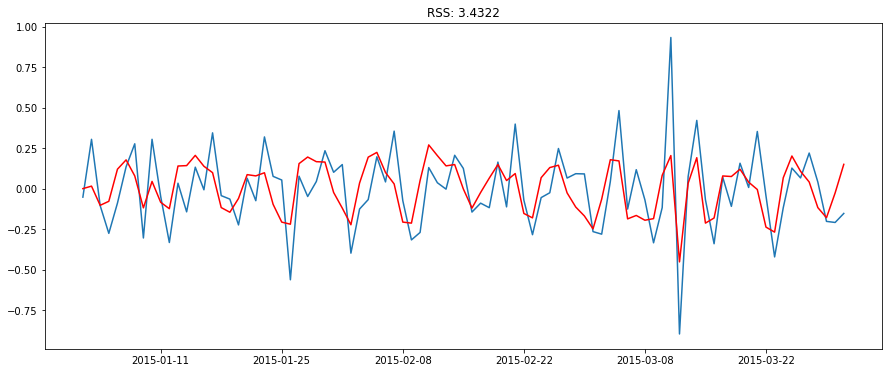

In [119]:
model = ARIMA(ts_log, order=(0, 1, 3))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')

plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\shrey\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5,1,'RSS: 2.5978')

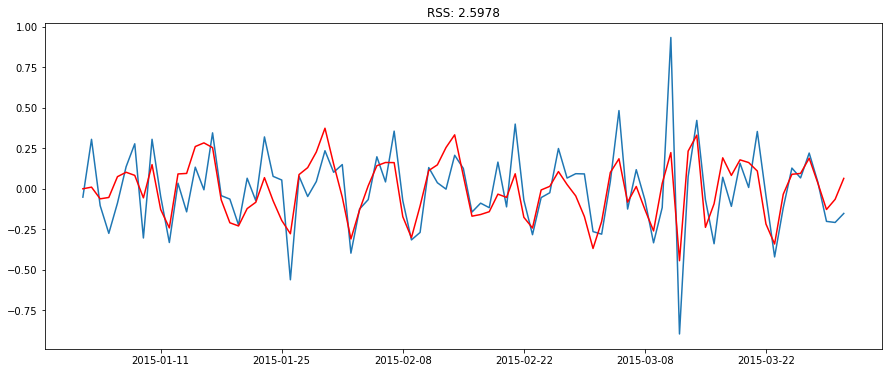

In [134]:
#try:
model = ARIMA(ts_log, order=(4, 1, 2))  
results_ARIMA = model.fit(disp=-1)
#except:
#    pass
    
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [135]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.sum   No. Observations:                   89
Model:                 ARIMA(4, 1, 2)   Log Likelihood                  30.702
Method:                       css-mle   S.D. of innovations              0.168
Date:                Wed, 13 Dec 2017   AIC                            -45.405
Time:                        17:04:01   BIC                            -25.495
Sample:                    01-02-2015   HQIC                           -37.380
                         - 03-31-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0002      0.002      0.076      0.939      -0.005       0.005
ar.L1.D.sum     0.4387      0.141      3.114      0.003       0.163       0.715
ar.L2.D.sum    -0.4504      0.117     -3.841    

count   89
mean    -0
std      0
min     -0
25%     -0
50%     -0
75%      0
max      1
dtype: float64


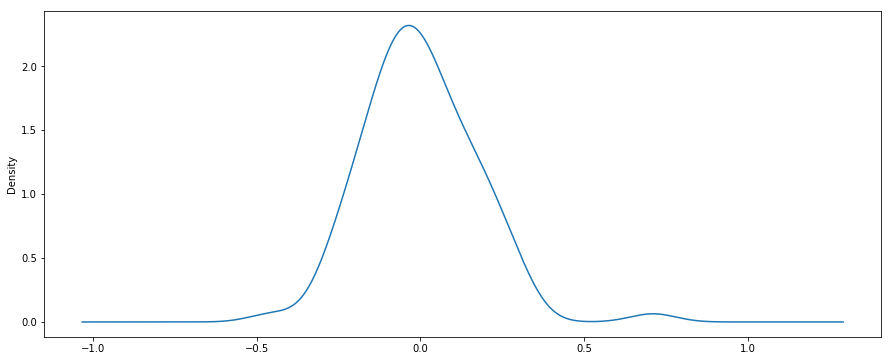

In [137]:
residuals = results_ARIMA.resid
residuals.plot(kind='kde')
print(residuals.describe())

In [121]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

DATE
2015-01-02    0
2015-01-03    0
2015-01-04   -0
2015-01-05   -0
2015-01-06    0
dtype: float64


In [122]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

DATE
2015-01-02    0
2015-01-03    0
2015-01-04   -0
2015-01-05   -0
2015-01-06   -0
dtype: float64


In [123]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


DATE
2015-01-01   15
2015-01-02   15
2015-01-03   15
2015-01-04   15
2015-01-05   15
dtype: float64

Text(0.5,1,'RMSE: 2302101.9303')

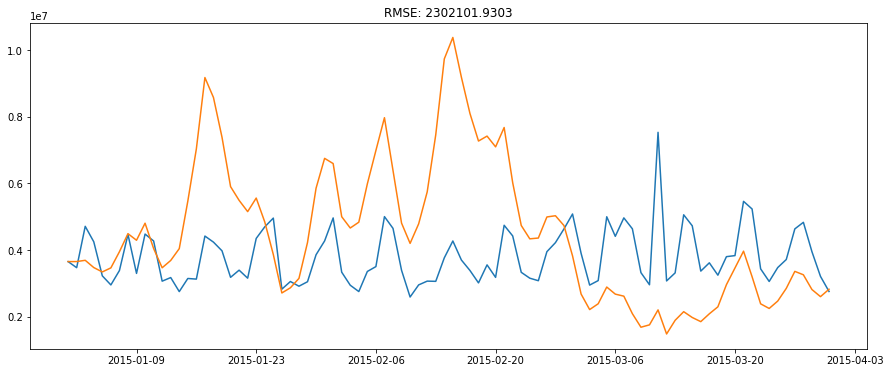

In [124]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df2['sum'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df2['sum'])**2)/len(df2['sum'])))